# SCIKIT-LEARN

The Data-Science eco-system of Python packages is large. A couple of the other popular ones:
* Statsmodels: supporting a wide range of regression (GLM, GAM, ...) and timeseries models
* SciPy: a more low-level tool for scientific computation
* TensorFlow: Neural Network package by Google
* PyTorch: Nearal Network package by Facebook
* Keras: a high-level interface to creae nn-architectures
* PyMC3: Bayesian modelling
* CVX: convex optimization
* SpaCy: natural language processing library
* transformers: a library & collection of transformer models, using the hugely powerfull transformer nn architecture for NLP
* ...

**scikit-learn** (aka **sklearn**) is probably one of the most accessible & popular Machine Learning library in Python.<br>
It offers a rich set of models, and a very elegant & user-friendly API covering the complete data-science workflow.<br>
If you could master one Machine Learning toolkit in Python, scikit-learn would probably be it.

Some background:<br>

The scikit-learn project **was started in 2007** as a Google Summer of Code project by David Cournapeau.<br>
Later that year, Matthieu Brucher started work on this project as part of his thesis.<br>

In **2010** a group of developers in **INRIA** (National Institute for Research in Digital Science and Technology) took leadership of the project and made the first public release.<br>

Since then, several releases have appeared following a ~ 3-month cycle, and a thriving international community has been leading the development.<br>

Before we dive into the library, first a few remarks on Machine Learnig.

# Machine Learning

**Statistical Modelling is …**<br>
a *subfield of mathematics* which deals with finding relationship between random variables.<br><br>

**Machine Learning is …**<br>
a *subfield of computer science* which deals with building systems that can learn from data, instead of explicitly programmed instructions.<br><br>

A different way of putting it: Machine Learning is the field of computer science build on top of statistics.<br>
The focus is on implementations & frameworks enable exploring all possibilities afforded by modern hardware achitectures.<br>

Contrary to statistics, where the focus is more on mathematical theory and reasoning with randomness / under uncertainty.<br>
ML is IMHO a less theoretical persuit and has a strong focus on application.<br>

In science an important objective is sparsity. To strip away all irrelevant detail and arrive at the a simplified desription of the world (a model) that is able to make accurate predictions in controlled experiments.<br>

In typical Data Science settings, the objective is to predict / approximate as accurate as possible, **where sparsity and understanding are less of a concern**.<br>

There are interesting discussions to be had regarding human bahaviour. Human bahaviour takes place in a messy world, instead of a highly controlled setting like in a scientific experiment. Therefore, the view of human learning as a messy feedback & adaptation process in a grosly overparameterized model (the typical human brain is has an estimated 100 trillion synapses) is probably very close tot he truth.<br>

Anyhow, let's not get sidetracked to much at the start ...

# Model Complexity & Overfitting

Using cmputers to aid statistical analysis has been around since the early days of computers.<br>
But ML in the sense of the sense of large datasets and large models, both made feasible by the ever increasing capabilities of computers, is relatively new.<br>

The complexity of the process generating the data and the number of available observations all play an intricate role in statistical inference.<br>
Very roughly speaking: a complex model can only be trusted if the underlying process is complex and there is sufficient data available to test it.<br>
When we do not have enough data or the model has too much 'freedom', we end up overfitting the data.<br>
A tell-tale sign is model predictions that are *too good to be true*.<br>

As a simple example: $a * x_1 + b * x_2 = y$ and $(x_1, x_2, y) = (1, 1, 10)$, what is $a$?<br>
From linear algebra we know that $n$ linear equations with $n-1$ unknowns will have a unique solution (if the $x$'s are independent)<br>
So in the above case, when we would observe a second sample, we could always find a solution.<br>
Stated differently, we can always find a line in 2D-space that perfectly fits 2 data points.
<br>

To *estimate* a population parameter (like $a$ & $b$), and indeed it's accuracy, we need many more observations than parameters.<br>
The relationship between the accuracy of a population estimate and the number of observations,<br>
is captured in the statistical concept of *degrees of freedom* (which goes to the hart of statistics).<br>

The relevance of this concept breaks down when dealing with overparameterized models.<br>
The model has many solutions which work well on our data & there is no way of telling which of those is most likely.<br>

The advent of Machine Learnig, is driven by two important developments:
* **computers** have become **much more powerfull**, resulting in **larger & more complex models**, helped by the fact that
* the available **data has grown exponentially**

The IDC forecasts the Global Datasphere to grow to 175 ZB by 2025 ... FYI: 
* One zettabyte = 10^21 bytes = 1000 exabytes = 1 million petabytes = 1 billion terabytes = 1 trillion gigabytes.
* If you could download the entire 2025 Global Datasphere at an average of 25 Mb/s, it would take 1.8 billion years to do it (earth age estimated at ~4.5B years)

### The ML way of dealing with overfitting & huge amounts of data
1. split the data in:
   * **train** dataset: used to train the model / estimate the model parameters.
   * **test** dataset: a dataset to test the generalizability to data other than the train data.
   * **validation** dataset: a dataset to test the validity of the final model on data that was never seen by the model.
   Often in practice the data is split into *train* and *test* and the *validation* step is done on the test data.<br>
   It is important to realize, that the the more data is used in the model selection process, the worse it will be at telling you how well the model generalizes.
2. **k-fold cross-validation**: Insead of discarding data during training, the data gets split into k 'folds' (read a random split into k subgroups), and a model is fit k times, where each time a different fold is excluded from training and used for validation.

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

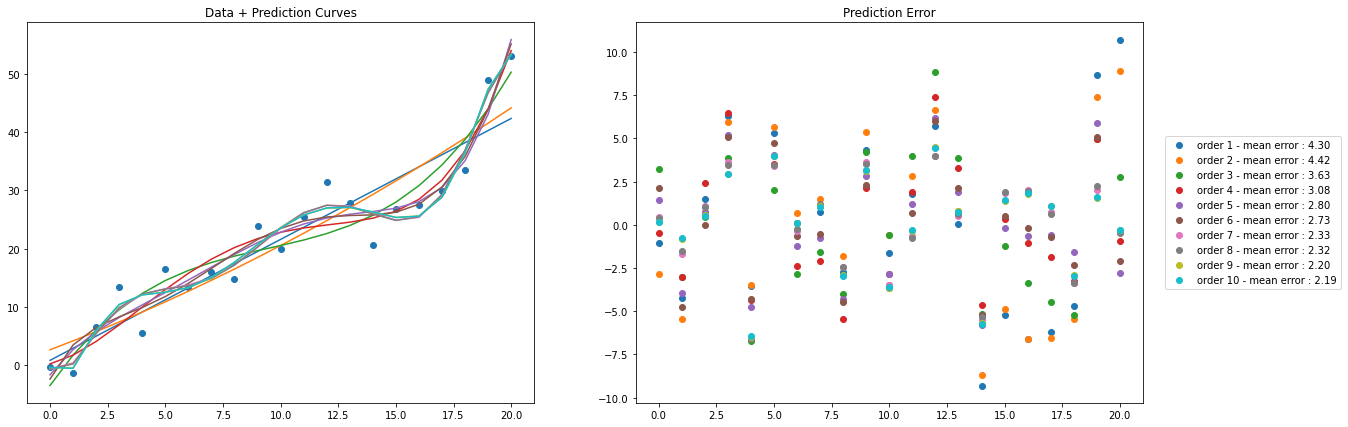

In [122]:
## the data generation process => simple linear equation with some errror added
x = np.linspace(0,20,num=21)
y = 2 + 2 * x + 5 * np.random.randn(len(x))
## setup plotting + scatterplot of data
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
ax1.scatter(x,y)
## create dataset with x**i note: generating x**0 ==> intercept, so have to add fit_intercept=False in LinearRegression
df = pd.DataFrame({f'x{ex}':x**ex for ex in range(22)})
lm = LinearRegression(fit_intercept=False)
## plot regression lines for polynomial regression up to order n
for ex in range(1,11):
    x_subset  = df.iloc[:,:(ex+1)]
    y_predict = lm.fit(x_subset, y).predict(x_subset)
    ## y_predict = lm.fit(x_subset[2:20], y[2:20]).predict(x_subset)
    ax1.plot(x, y_predict)
    ax2.scatter(x, y-y_predict, label=f'order {ex} - mean error : {np.abs(y-y_predict).mean():.2f}')
ax1.set_title('Data + Prediction Curves')
ax2.set_title('Prediction Error')
ax2.legend(loc='center right', bbox_to_anchor=(1.4, 0.5));

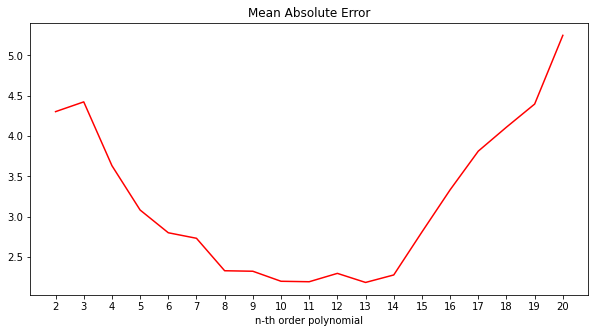

In [134]:
## plot mean absolute error as function of order of the polynomial
poly_ord = np.linspace(2, 20, num=19).astype(np.int)
poly_mae = np.array([np.abs(y-df.iloc[:,:ix].pipe(lambda d: lm.fit(d,y).predict(d))).mean() for ix in range(2,21)])
_, ax    = plt.subplots(figsize=(10,5))
ax.plot(poly_ord, poly_mae,'-r')
ax.set_xticks(poly_ord)
ax.set_xlabel('n-th order polynomial')
ax.set_title('Mean Absolute Error');

# ML Taxonomy 101: Supervised Learning v Unsupervised Learning

The two main categories:
* **Supervised Learning**: where a known outcome is available. This outcome variable is often called the target.
* **Unsupervised Learning**: where there is not a natural dependent variable, a value / label to be predicted.

<img src="plots/ml_taxonomy.png" width="700px"><br>

In addition to these two main categories, there are many subtle variations, like:
* **semi-supervised** learning: where the outcome / label is only known for some of the training examples
* **re-inforcement** learning: where the best response to some situation is learned in terms of maximizing some cumulative reward of actions / decisions (Typically represented as a Markov Decision Process)

# Where does scikit-learn fit in?

scikit-learn sits between more statistically oriented packages like *stasmodels*, or *Py3MC* and the modern deep neural network libraries (TensorFlow, PyTorch, ...) that are IMHO black boxes with pre-cooked layer-architectures. scikit-learn offers a wealth of models & and a convenient & intuitive API to work with these models in modern data-science workflows.<br>

It does not cover the use case of datasets that can no longer fit in memory (although extensions using DASK are available), or indeed models that no longer fit in memory. As an example of the latter, openAI has recently released it's GPT-3 language model containing 175 Billion parameters.<br>

scikit-learn provides powerfull and (relatively) easy to use tools for problem-sizes that fit in memory in more capable systems,<br>
the type of problem that typically occur in a company like Nationwide!

# The scikit-learn API

An API is an interface that allows the user to interact with a library.<br>
It is basically a set of *interfaces* that allows you to call the functionality offered by the library.<br>

A good API is:
1. stable
2. intuitive
3. integrate with existing tools
4. flexible

scikit-learn is all of these. The breadth of tools it provides is overwelming.<br>
But, like any good API, the way to use all this functionality is mostly intuitive and consistent.

In [ ]:
import sklearn
help(sklearn)

## Typical Data Science Workflow

1. **load data**
2. **pre-processing** & **feature enginering**, just to mention a few of the many 'transformaers' available:
   * `sklearn.impute.SimpleImputer`: simple imputation using strategy: mean, median, most_frequent, constant
   * `sklearn.feature_selection.SelectPercentile` : select % of features with 'best' uniform association, based on some measure.
   * `sklearn.preprocessing.Normalizer`: normalization / scaling to unit norm, where norm: l1, l2, max, ...
   * `sklearn.preprocessing.OneHotEncoder`: encoding categorical variables
   * `sklearn.preprocessing.KBinsDiscretizer`: bin a numeric variable into discrete bins
   * `sklearn.decomposition.PCA`: dimensionality reduction
3. select, configure model and **fit** the model
   * `fit` (aka train in the ML literature): find the parameter values that minimize some cost function, with optionally some regularization term
4. model **evaluation** / selection --> maybe go back to (2)
   * `sklearn.model_selection.confusion_matrix`
   * `sklearn.model_selection.auc`
   * `sklearn.model_selection.roc_curve`
   * `sklearn.model_selection.r2_score`
5. **deploy** the model

Additionally, care needs to be taken to guard against overfillling:
* `sklearn.model_selection.train_test_split`: split train & validate
* `sklearn.model_selection.KFold`: cross validation
* `sklearn.model_selection.GridSearchCV`: put your kfold cv inside a loop that iterates all points span by a grid of hyperparameters 

For supervised learning you also need to decide on the target variable.<br>
The single most important descision you'll make is choosing which target to go after.<br>
Think long and hard about what you are going to predict.<br><br>

**TAKE YOUR TIME CHOOSING YOUR TARGET!**.<br>
Do not be fooled by other people (usually domain experts) telling you what they want predicting,<br>
they are almost always not critical enough & and are simply unaware of the importance of getting this right.<br>
This is where a good data-scientist will challenge & be a gate-keeper for work doomed to not deliver!<br>

Let's start with some simple coding ...

## Load Data

scikit-learn integrates well with numpy & pandas so we can use these tools to load the data.<br>
```python
import pandas as pd
pd.read_csv(...)
pd.read_excel(...)
pd.read_sas(...)
pd.read_sql(...)
...
```

In [ ]:
df = pd.read_csv('data/titanic.csv')
df.isna().sum()

In [ ]:
## let's read in some data, so we can actually do some stuff
## side note: piping to filter columns + columns with no missings in Sex or Embarked
df = pd.read_csv('data/titanic.csv')\
       .pipe(lambda d: d.loc[~d[['Sex','Embarked']].isna().any(axis=1), 
                             ['Survived', 'Pclass', 'Sex', 'Embarked', 'Age']
                            ]
            )
df.head()

In [ ]:
df.dtypes

In [ ]:
df.Pclass = df.Pclass.astype('int8')

## Pre-Processing / Feature Engineering

The columns Sex & Embarked are categorical. Scikit-learn does only works with numerical data.<br>
So as a first preprocessing step, these need to be converted into dummy variables ...

In [ ]:
print(df.Embarked.value_counts())
print(df.Sex.value_counts())

Dummy coding can be achieved by using `sklearn.preprocessing.OneHotEncoder`. Note the steps below are for educational pupose only.

In [ ]:
## import the encoder
from sklearn.preprocessing import OneHotEncoder
## set-up the encoder (sparse=False is almost never used, but convenient here to show the results)
ohe = OneHotEncoder(sparse=False, categories=[['S','C','Q'],['male','female']], drop='first')
## fit the encoder - note: this is a bit ugly, but before a transformer can be used, it needs to be 'fit'
ohe.fit(df[['Embarked','Sex']])
## 
ohe.transform(df[['Embarked','Sex']])

In [ ]:
## creating X & y
X = np.hstack((ohe.transform(df[['Embarked','Sex']]), df[['Pclass']]))
y = df.Survived
## and fit a model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
print('LR model has an accuracy of: ', (lr.predict(X)==y).mean())
print('Base Rate / most frequent class as estimate: ', df.Survived.value_counts(normalize=True)[0])

### A Better Way: Column Transformers

The above way to create you data using *np.hstack* is a bit clunky, a better way using *column transformers* ...<br>
Below we use **make_column_transformer** to create an object of type ColumnTransformer, that provides us with a `fit`, `transform`, and `fit_transform`.<br>

Later in this tutorial, pipelinesare discussed. Pipelines combine multiple processing steps as a list of (Estimator) objects.<br>
A pipeline has fit and transform methods. Broadly speaking, it simply calls `fit` and `transform` on the individual objects in the list.

In [ ]:
from sklearn.compose import make_column_transformer
## define the column_tranformer / 
col_trans = make_column_transformer(
                (OneHotEncoder(drop='first'),['Sex','Embarked']),
                remainder='passthrough'
            )
## apply the column transformer
X_transformed = col_trans.fit_transform(df[['Pclass','Sex','Embarked']])
## have a look
X_transformed

## Dealing With Overfitting

Fitting a model against some data is only half the battle. To have a usefull model it must not only perform well on data thta it was trained on, but also on data that it has not seen. Steted differently, the model must generalize well.<br>

The functionality to help us select a model, is provided in `sklearn.model_selection`. 

In [ ]:
import sklearn.model_selection
help(sklearn.model_selection)

A simple way to just guard against over-fitting, is done by splitting the data into train, and test.<br>
A convenient way is to use the **train_test_split** function sklearn provides.
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, ..., stratify=...)
```
This needs to be done with care, so we end up with training data that is comparable to the test data.<br>
Especially when the target occurs relatively infrequent, pay attention to the **stratify** parameter in the train_test_split function.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
## using train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, stratify=df.Embarked, random_state=42)
lr = LogisticRegression()

... and to `fit` the model to the train data ...

In [ ]:
lr.fit(X_train, y_train)
print('LR model has an accuracy of: ', (lr.predict(X_test)==y_test).mean())

Or, to split the data in 5 & call fit 5 times, each time with one of the groups left out ...

In [ ]:
## using cross-validation
lr = LogisticRegression()
cross_val_score(lr, X, y, cv=5, scoring='accuracy')

In [ ]:
print('LR model has an accuracy of: ', _.mean())

## Train Model

To train a model we need to:
* choose/import the mode of choice and configure the model & set some hyper parameters
* **fit** the model on the training data
* maybe do a grid search over a grid of hyper parameters, or a n-fold cross validation

In [ ]:
## use the inspect module to see which classes are defined in sklearn.linear_model
import inspect
## linear model: OLS + regularized methods like Ridge, Lasso, and Elastic-Net + more advanced Bayesian Ridge regression & ARDRegression +
## generalized linear models: logistic + loglinear models + ...
import sklearn.linear_model
[m[0] for m in inspect.getmembers(sklearn.linear_model, inspect.isclass)]

## Model Evaluation / Validation

Once the model is fit, the 'quality' of the model needs to be evaluated.<br>
sklearn provides a three different APIs for evaluating the quality of a model’s predictions:
* score method: estimators have a score method providing a default evaluation criterion for the problem they are designed to solve.
* scoring parameter: model-evaluation tools using cross-validation (like: model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy.
* metrics functions: the metrics module implements functions assessing prediction error for specific purposes, see below (also the dos for: classification metrics, multilabel ranking metrics, regression metrics, and clustering metrics).

In [ ]:
import sklearn.metrics
[m[0] for m in inspect.getmembers(sklearn.metrics, inspect.isfunction)]

# scikit-learn API

## Key Classes:  Transformers, Estimators, & Pipelines

It's now time to build a deeper understanding of how the components of sklearn work together.<br>
First of all, the base of the object hierarchy is **BaseEstimator**. <br>
This class gets combined with so called *mixin* classes to build rich hierarchy of classes ...<br>

It helps to think in terms of Transformers and Estimators:
* **BaseEstimator**
  * **Transformers** (BaseEstimator, TransformerMixin): input data &rarr; output transformed data
  * **Estimator** / Model (BaseEstimator, ClassifierMixin / ClusterMixin / RegressorMixin): input data &rarr; output a model
* **Pipeline**: stacks a bunch of steps, where the steps are:
  * Transformers
  * Estimators
  * Pipeline: Pipelines can contain Pipelines
  * FeatureUnion: joins two Pipelines

<br>
<font style="color:red; font-weight:bold; font-size:150%">Pipelines form the core of working effectively with scikit-learn.</font><br>
<br>
Transformers and Estimators form the building blocks, but the way to combine them in pipelines makes scikit-learn powerfull.

There is an interesting video with Andreas Mueller, a core developer & release manager of scikit-learn on youtube.<br>
He gives a few good tips on how to use the library:
* *Everybody should be using pipelines. If you're not using pipelines, you are probably doing it wrong!*
* *If you haven't looked at the ColumnTransformer, look at the ColumnTransformer!*
* *Pick your metric with care. Accuracy is used as a default, but for unbalanced data, accuracy is a terrible metric.*
* *On the importance of pipelines: techniques like FeatureSelection, Imputation, ... should take place inside the pipeline.*

## Transformers & Estimators

Because the goal here is build up some intuition, I'm going to simplify things a bit.<br>
The distinction between Transformers and Estimators is fuzzy.<br>
But, roughly speaking a Transformer transforms the data to go into an Estimator, think model.<br>
And, if you strip away the details ...

* **Transformers**: classes that process the data (take some input do some processing and produce a transformed versionof the input)<br>
  The two important methods that they all have in common:
  * `fit(X, [y])`: find params of transformation
  * `transform(X, [y])`: appies transformation to X

```python
class myTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, ...): pass
    def fit(self, data): pass
    def trasform(self, data): pass
```

* **Estimator**: take some data, fit/train some model (estimate parameters)<br>
  The two important methods that they all have in common:
  * `fit(X, y)`: find best fitting params given X and hyper params
  * `predict(X, y)`: predict label based on X

```python
class myEstimator(SomeModelClassMixin, BaseEstimator):
    def __init__(self, ...): pass
    def fit(self, data): pass
    def predict(self, data): pass
```

The distinction is fuzzy, since most Transformers also need capture parameter values of the transformation.<br>
For instance, if we normalize a variable, we need the mean & standard deviation ...

## Pipeline

A Pipeline is a sequence of steps, where the step gets executed sequentially.<br>

The classic Pipeline is a bunch of Transformers followed by an Estimator.<br>
In this case the two most important methods are defined as:
* `transform(X, [y])`: call `fit` then `transform` on each step contained inside.
* `predict(X, [y])`: call transform on each step then `predict` on the final step 

A Pipeline is created by passing in a list of tuples of the form: `[(name, transformer), ...]`<br>
There is also a convenience function `make_pipeline` that makes this process even easier.

In [ ]:
## let's create a really simple Transformer class: it simply selects a (set of) column(s)
from sklearn.base import TransformerMixin, BaseEstimator
class FactorExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, factor): self.factor = factor
    def transform(self, data): return data[[self.factor]]
    def fit(self, *_): return self

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Survived'), df['Survived'], train_size=0.20, stratify=df.Embarked, random_state=0)

In [ ]:
X_train.head()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
pl = make_pipeline(FactorExtractor('Age'), SimpleImputer(strategy='median'), LogisticRegression())

In [ ]:
pl.fit(X_train, y_train)

In [ ]:
pl.score(X_test, y_test)

In [ ]:
pl.predict_proba(X_test)[:10,1]

In [ ]:
## now without Pipelines
lr = LogisticRegression()
lr.fit(X_train[['Age']].fillna(X_train.Age.median()), y_train);

In [ ]:
lr.predict_proba(X_test[['Age']].fillna(X_test.Age.median()))[:10,1]

In [ ]:
(pl.predict_proba(X_test) == lr.predict_proba(X_test[['Age']].fillna(X_test.Age.median()))).all()

What went wrong here?<br>
Both cases a `LogisticRegression` of Survived on Age & both impute missing values with the mean!

The above is a classic mistake: preprocessing on the test data is not the same as preprocessing on the test data!<br>
This is easily fixed, but it illustrates the point that Pipelines are a usefull abstraction that can prevent you from making mistakes like this ...<br>

The issue is easily fixed here, but immagine when more messy preprocessing is done, and the validation is done by a co-worker, or when cross-validation, or some grid search is used...<br>
(where it is important that the preprocessing is part of the pipeline)

In [ ]:
print(X_train.Age.median(), X_test.Age.median())

In [ ]:
(pl.predict_proba(X_test) == lr.predict_proba(X_test[['Age']].fillna(X_train.Age.median()))).all()

## ColumnTransformer

This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
## HistGradientBoostingClassifier is very much like XGBoost, but still experimental in this version of scikit-learn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
numerical_features   = ['Age']

In [ ]:
cat_pipe = Pipeline([
    ('impute',  SimpleImputer(strategy='most_frequent')),
    ('dummies', OneHotEncoder(drop='first')) 
])
num_pipe = Pipeline([
    ('impute',  SimpleImputer(strategy='median')),
    ('scale',   StandardScaler())
])

In [ ]:
feature_pipeline = ColumnTransformer([
    ('continuous',  num_pipe, numerical_features),
    ('categorical', cat_pipe, categorical_features)
])
## note specify: remainder='passthrough' if you want the remaining columns to get tagged along

In [ ]:
X_train.head()

In [ ]:
feature_pipeline.fit_transform(X_train)[:5].T

In [ ]:
## create a pipeline where these preprocessing steps are followed by a HistGradientBoostingClassifier
hgb_pipeline = make_pipeline(feature_pipeline, HistGradientBoostingClassifier())
hgb_pipeline.fit(X_train, y_train)

The XGBoost ensemble algorithm and its variants have proved very, very powerfull & have consitently been in the top entries on Kaggle competitions ...

In [ ]:
hgb_pipeline.score(X_test, y_test)

Just to show off the power of Pipelines, lets do a 5-fold cross validation on the pipeline ...

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(hgb_pipeline, pd.concat([X_train,X_test]), pd.concat([y_train, y_test]), cv=5)

## FuncionalTransformer 

A FunctionTransformer forwards its X (and optionally y) arguments to a user-defined function or function object and returns the result of this function.

In [ ]:
from sklearn.preprocessing import FunctionTransformer



# Future Topics ...

* Usefull Transformations
  * KBinsDiscretizer
  * OneHotEncoder
  * FunctionTransformer
* Feature Selection
  * SelektKBest: select features according to the k highest scores
  * RFECV: feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
* Model Selection and Evaluation
  * Metrics: accuracy, AUC, ROC, F1, ...
  * Cross Validation: 
  * GridSearch: find the best hyper parameters
* Dealing with unbalanced data
  * Downsampling: relatively effective
  * SMOTE: has not proved very effective
* Model Deep Dive:
  * Supervised models:
    * Continuous target
    * Discrete Target
  * Unsupervised models:
    * Clustering
    * Anomaly Detection